In [35]:
# This is image recognized model with tensorflow an kera built in libarary
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy

In [72]:
#  loading muti_image data in the keras to porcess
# Single image size has reduced the size for training 
IMAGE_SIZE = 256
# Bath of image from the dir in random shuffle bath
BATCH_SIZE = 32
EPOCHS = 50
# lodaing
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "images",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [67]:
className = dataset.class_names
className


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [65]:
len(className)

3

In [64]:
len(className)

3

In [ ]:
# this is a batch we have in dataset

In [31]:
68*32

2176

In [54]:
# check data in the numpy 
for image_batch, label_bath in dataset.take(1):
    print(image_batch[0].numpy())

[[[146. 144. 158.]
  [153. 151. 165.]
  [159. 157. 171.]
  ...
  [120. 112. 127.]
  [110. 102. 117.]
  [123. 115. 130.]]

 [[181. 179. 193.]
  [168. 166. 180.]
  [159. 157. 171.]
  ...
  [100.  92. 107.]
  [102.  94. 109.]
  [119. 111. 126.]]

 [[175. 173. 187.]
  [170. 168. 182.]
  [174. 172. 186.]
  ...
  [103.  95. 110.]
  [113. 105. 120.]
  [116. 108. 123.]]

 ...

 [[135. 127. 140.]
  [114. 106. 119.]
  [125. 117. 130.]
  ...
  [107.  95. 107.]
  [104.  92. 104.]
  [101.  89. 101.]]

 [[145. 137. 150.]
  [132. 124. 137.]
  [139. 131. 144.]
  ...
  [109.  97. 109.]
  [105.  93. 105.]
  [101.  89. 101.]]

 [[136. 128. 141.]
  [129. 121. 134.]
  [135. 127. 140.]
  ...
  [105.  93. 105.]
  [101.  89. 101.]
  [ 96.  84.  96.]]]


In [62]:
for image_batch, label_bath in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


In [69]:
className

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

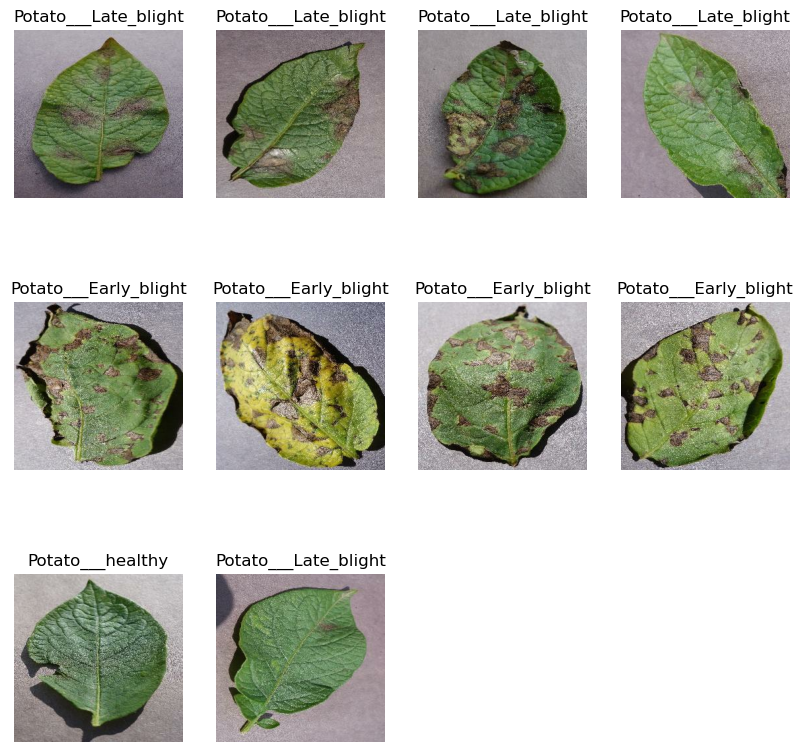

In [71]:
plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(10):
        ax = plt.subplot(3,4,i+1)  
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(className[label_batch[i]])
        plt.axis("off")

In [73]:
len(dataset)

68

In [ ]:
# Split dataset for traning
# 100% =80% + 20%
# 20% = 10% + 10% (for validation)
# 80 for traning and 10 for try and error an 10 for final test validation

In [74]:
len(dataset)# this 100%

68

In [77]:
train_size = 0.8 zc
len(dataset)*0.8


54.400000000000006

In [78]:
train_ds = dataset.take(54) #dataset array cut first 54 %
len(train_ds)
# 68 (100%) - 54(80%)

54

In [79]:
test_ds = dataset.skip(54)

In [81]:
len(test_ds)
# 68 (100%) - 14(20%)

14

In [83]:
len(dataset)*0.1

6.800000000000001

In [85]:
#final test validated exmaple 
val_ds = test_ds.skip(6)
len(val_ds)

8

In [95]:
def dataset_partition_tf(dataset,train_split= 0.8, val_split=0.1, test_split= 0.1,shuffle= True, shuffle_size = 10000):
    ds_size = len(dataset)
    if shuffle:
        dataset = dataset.shuffle(shuffle_size,seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size).take(val_size)
    
    return train_ds,val_ds,test_ds

In [96]:
train_ds,val_ds,test_ds = dataset_partition_tf(dataset)

In [98]:
print(len(train_ds),len(val_ds),len(test_ds))

54 6 6


In [99]:
# Save cache while traing can optimise our processing time on CUP and GPU
train_ds= train_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)


In [112]:
#method for resizing the image for traing or test or reallife 
#Training images will process into different dimimesion and scale
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [130]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [132]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [135]:
#Preparing with CNN Convolutional Neuron Network for our model

#convolution layer(raw input processing)
#filter layer are 32,64,.. and (3,3),(3,2),kernel_size,.. filter pixle size
#hidden layer is relu for faster generating

#pooling layer(pick possible result)
#filter layer are 32,64,.. and (3,3),(3,2),kernel_size,.. filter pixle size
#hidden layer is relu for faster generating

#Flatter Layer (Dense =64)
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)



In [136]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (256, 256, 256)           0         
                                                                 
 conv2d_60 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_60 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_61 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_61 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_62 (Conv2D)          (32, 60, 60, 64)        

In [ ]:
# Above are our neuron network architecture


In [140]:
#each epochs optimizer
model.compile(optimizer= 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
              metrics = ["accuracy"])

In [142]:
#start trainig with our data set and recorded or history
history = model.fit(train_ds,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose = 1,
                    validation_data= val_ds)

Epoch 1/50
54/54 [==============================] - 125s 2s/step - loss: 0.9152 - accuracy: 0.4873 - val_loss: 0.7739 - val_accuracy: 0.5417
Epoch 2/50
54/54 [==============================] - 109s 2s/step - loss: 0.6751 - accuracy: 0.6736 - val_loss: 0.5218 - val_accuracy: 0.7656
Epoch 3/50
54/54 [==============================] - 110s 2s/step - loss: 0.3942 - accuracy: 0.8455 - val_loss: 0.2777 - val_accuracy: 0.9323
Epoch 4/50
54/54 [==============================] - 106s 2s/step - loss: 0.2480 - accuracy: 0.8970 - val_loss: 0.2225 - val_accuracy: 0.9167
Epoch 5/50
54/54 [==============================] - 106s 2s/step - loss: 0.3385 - accuracy: 0.8634 - val_loss: 0.3589 - val_accuracy: 0.8333
Epoch 6/50
54/54 [==============================] - 109s 2s/step - loss: 0.2250 - accuracy: 0.9080 - val_loss: 0.1231 - val_accuracy: 0.9531
Epoch 7/50
54/54 [==============================] - 123s 2s/step - loss: 0.1508 - accuracy: 0.9381 - val_loss: 0.2363 - val_accuracy: 0.9167
Epoch 8/50
54

In [143]:
#evaluate our models with test dataset
model.evaluate(test_ds)

6/6 [==============================] - 8s 378ms/step - loss: 0.3277 - accuracy: 0.9167


[0.3276844322681427, 0.9166666865348816]

In [144]:
#check the history
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [150]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [157]:
#Now visulize model 
accuracy = history.history['accuracy']
val_accuarcy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

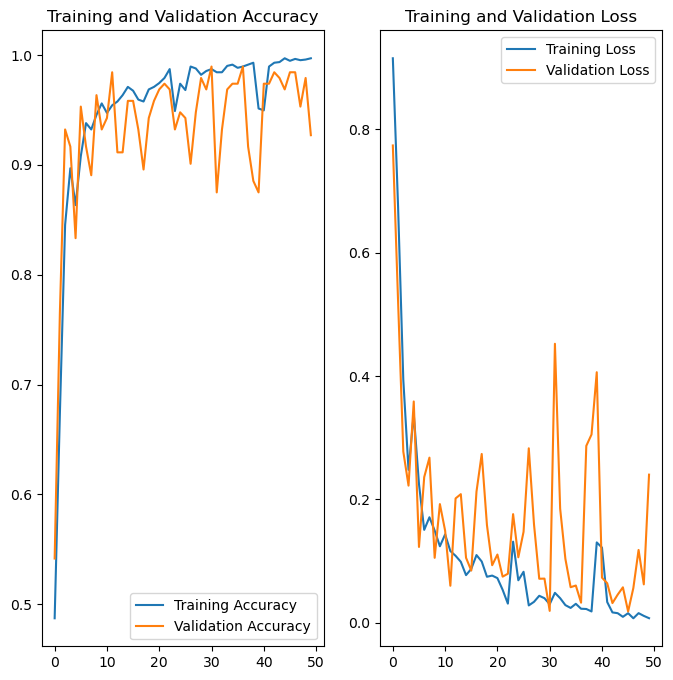

In [163]:
plt.figure(figsize= (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), accuracy,label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_accuarcy,label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss,label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss,label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

label: Potato___Late_blight
1/1 [==============================] - 1s 559ms/step
predition label  Potato___Late_blight


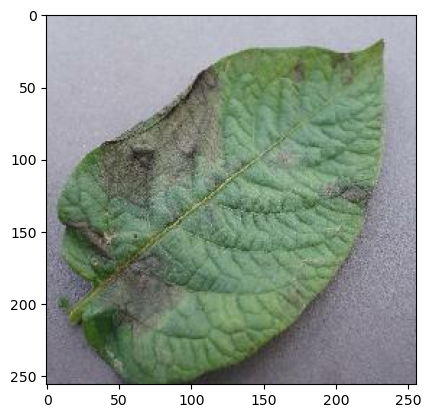

In [174]:
#test an image example
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_img = images_batch[1].numpy().astype('uint8')
    f_lable = labels_batch[1].numpy()

    plt.imshow(first_img)
    print("label:",className[f_lable])
    
#let test with our model
    batch_prediction = model.predict(images_batch)
    print("predition label ",className[np.argmax(batch_prediction[1])])

In [201]:
#predict with many image
def predict(model,image):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    #batch perdicted images
    img_array = tf.expand_dims(img_array,0)
    
    prediction = model.predict(img_array)
    
    predicted_class = className[np.argmax(prediction[0])]
    confidence = round(100*(np.max(prediction[0])),2)
    return predicted_class,confidence
    

1/1 [==============================] - 0s 31ms/step


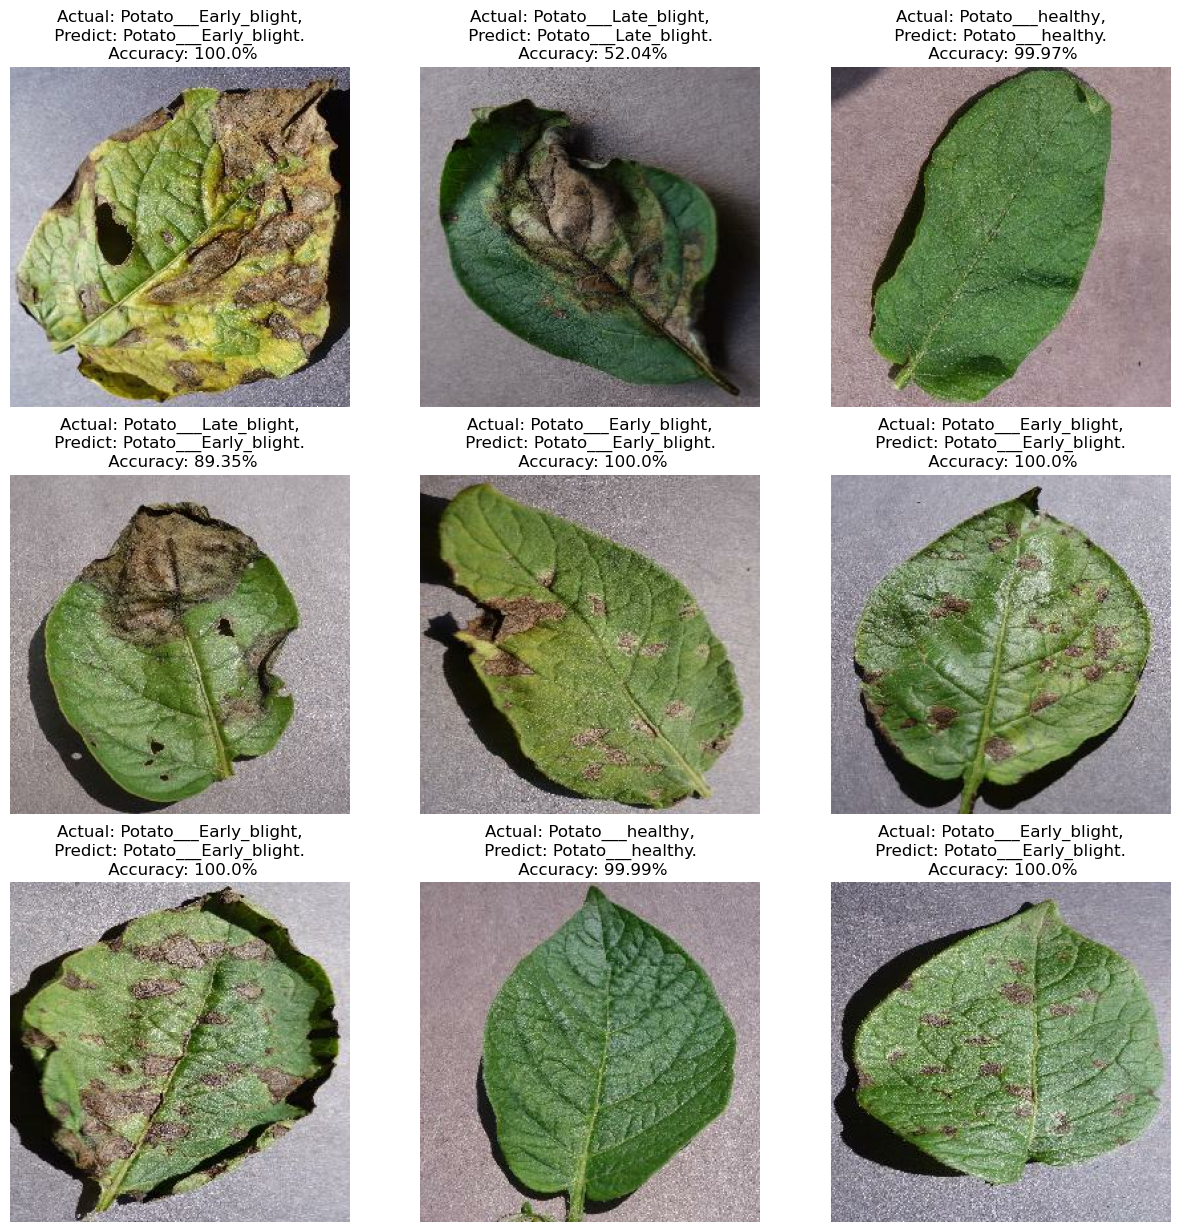

In [203]:
plt.figure(figsize=(15,15))
for images , labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model,images[i].numpy())
        actual_class = className[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predict: {predicted_class}. \n Accuracy: {confidence}%")
        
        plt.axis('off')

In [204]:
model_version=1
model.save(f"../models/{model_version}")


INFO:tensorflow:Assets written to: ../models/1/assets


INFO:tensorflow:Assets written to: ../models/1/assets
